# IVCSD Vending Machine Data Analysis

Welcome to the IVCSD Vending Machine Data Analysis notebook. In this notebook, we will be automatically analyzing the vending machine data provided by IVCSD. All graphs generated will be saved as a picture to the `output` folder. Please run the `setup` code cell first. Then for each analysis you want, you can simply run the corresponding code block under each heading. If you do not see the custom theme, run it again to refresh inline styles.

## Get the Data
1. Login to [IQ Tech Portal](https://iqtechportal.com/)

### Transaction Report
1. Go to `Reports > Transaction Report`
2. Select the Date Range that you want to apply to the report 
3. Click on `View Report`
4. Click on the **Double Down Arrow** icon to the left of the `View Report` button
5. Check `User Limit Response`
6. On the top right corner, select `Export` and download as `CSV`

### Restock Report
1. Go to `Reports > Restock Summary Report`
2. Select the Date Range that you want to apply to the report 
3. Click on `View Report`
4. On the top right corner, select `Export` and download as `CSV`

## Import the Data
1. Put both CSV files into the `data` folder of this project
2. Make sure they have the file names `TransactionReport.csv` and `RestockSummaryReport.csv` respectively

## Setup

Please run the following code cell to setup the project as necessary. **!!!THIS CELL NEEDS TO RAN AT THE START EVERY TIME THIS CODE IS EXECUTED!!!**

It will produce two `pandas.Dataframe` objects: `tDF` and `rDF` for the transaction report and restock report respectively. We will also extract the start date and end date of the data from the reports.

### Options

There are 4 options that you can change in the code cell below:
```
TRANSACTION_HEADER_ROWS
TRANSACTION_FOOTER_ROWS
RESTOCK_HEADER_ROWS
RESTOCK_FOOTER_ROWS
```
These specify the number of rows to skip at the top and bottom of the CSV files. The defaults are set to the values that I found to work for the data that I have. If you have different data, you might need to adjust these values. These rows are skipped simply because they do not contain the raw data that we are looking for. Basically, anything above the headers and below the last data entry needs to be skipped.

In [ ]:
import pandas as pd
import numpy as np
import csv
from datetime import datetime as dt
import matplotlib.pyplot as plt
from pathlib import Path
import collections as col
from aquarel import load_theme


TRANSACTION_HEADER_ROWS = 5
TRANSACTION_FOOTER_ROWS = 2
RESTOCK_HEADER_ROWS = 3
RESTOCK_FOOTER_ROWS = 0

#* Get and load the data files into memory
transactionCSV = Path("data/TransactionReport.csv")
restockCSV = Path("data/RestockSummaryReport.csv")

TRANSACTION_FROM_DATE = None
TRANSACTION_TO_DATE = None
RESTOCK_FROM_DATE = None
RESTOCK_TO_DATE = None

TITLE_FONT_DICT = {'fontname': 'Sans',
        'color':  'black',
        'weight': 'heavy',
        'size': 24,
        }

LABEL_FONT_DICT = {'fontname': 'Sans',
        'color':  'black',
        'weight': 'bold',
        'size': 16,
        }

tDF = None
rDF = None
if transactionCSV.is_file():
    with open(transactionCSV, 'r') as csvfile:
        tReader = csv.reader(csvfile)
        
        TRANSACTION_FROM_DATE = dt.strptime(next(tReader)[1], '%m/%d/%Y')
        TRANSACTION_TO_DATE = dt.strptime(next(tReader)[1], '%m/%d/%Y')
        
        tDF = pd.read_csv(transactionCSV, skiprows=TRANSACTION_HEADER_ROWS, skipfooter=TRANSACTION_FOOTER_ROWS, engine='python')
        

if restockCSV.is_file():
    with open(restockCSV, 'r') as csvfile:
        rReader = csv.reader(csvfile)
        
        RESTOCK_FROM_DATE = dt.strptime(next(rReader)[1], '%m/%d/%Y')
        RESTOCK_TO_DATE = dt.strptime(next(rReader)[1], '%m/%d/%Y')
        
        rDF = pd.read_csv(restockCSV, skiprows=RESTOCK_HEADER_ROWS, skipfooter=RESTOCK_FOOTER_ROWS, engine='python')

if tDF is not None:
    print("This notebook has been setup to analyze data from {} to {} for transaction data.".format(TRANSACTION_FROM_DATE.strftime("%m/%d/%Y"), TRANSACTION_TO_DATE.strftime("%m/%d/%Y")))

if rDF is not None:
    print("This notebook has been setup to analyze data from {} to {} restock data.".format(RESTOCK_FROM_DATE.strftime("%m/%d/%Y"), RESTOCK_TO_DATE.strftime("%m/%d/%Y")))

#* Helper functions defined below
def addLabelsToBar(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center', fontdict=LABEL_FONT_DICT)

def charSlicer(a,start,end):
    b = a.view((str,1)).reshape(len(a),-1)[:,start:end]
    return np.frombuffer(b.tobytes(),dtype=(str,end-start))

## Gender

In [ ]:
%matplotlib inline
theme = load_theme("arctic_light")
fig, ax = plt.subplots(figsize=(8, 8))

data = tDF['enter gender']
data = data.fillna(0).value_counts().to_dict()

labelKey = { 0: "No Response",
            1: "Male",
            2: "Female",
            3: "Nonbinary"
            }

labels = list(labelKey[k] for k in data.keys())
data = list(data.values())

ax.pie(data, labels=labels, autopct='%1.1f%%', startangle=140)
ax.legend(title="Legend")
ax.set_title("Gender", fontdict=TITLE_FONT_DICT)

theme.apply()
fig.savefig("output/gender.png", facecolor=fig.get_facecolor())

## Racial Demographic

In [ ]:
%matplotlib inline
theme = load_theme("arctic_light")
fig, ax = plt.subplots(figsize=(22, 8))

data = tDF['race']
data = data.fillna(0).value_counts().to_dict()
data = col.OrderedDict(sorted(data.items()))

labelKey = {0: "No Response",
            1: "American Indian/Alaska Native",
            2: "Asian",
            3: "African American/Black",
            4: "Hispanic",
            5: "Middle Eastern",
            6: "Native Hawaiian/Pacific Islander",
            7: "Caucasian/White",
            8: "Other Race"
            }

labels = [labelKey[k] for k in data.keys()]
data = list(data.values())

ax.bar(labels, data)
addLabelsToBar(labels, data)
ax.set_title("Racial Demographic", fontdict=TITLE_FONT_DICT)
ax.set_ylabel("Number of Users")

theme.apply()
fig.savefig("output/racial.png", facecolor=fig.get_facecolor())

## Age

In [ ]:
%matplotlib inline
theme = load_theme("arctic_light")
fig, ax = plt.subplots(figsize=(18, 8))

data = tDF["enter age"]
data = data.fillna(0)


counts, bins, _ = plt.hist(data, bins=[0,1,18,25,35,45,65,data.max()])
data = counts
plt.cla()

labelKey = {0: "No Response",
            1: "<18",
            18: "18-24",
            25: "25-34",
            35: "35-44",
            45: "45-64",
            65: "65+"
            }

labels = [labelKey[k] for k in bins[:-1]]

ax.bar(labels, data)
addLabelsToBar(labels, data)
ax.set_title("Age Demographic", fontdict=TITLE_FONT_DICT)
ax.set_ylabel("Number of Users")

theme.apply()
fig.savefig("output/age.png", facecolor=fig.get_facecolor())

## Zip Code

There is no complete automated way of making this visualization yet. The following code cell will generate a CSV file that you can drag and drop onto [EasyMapMaker](https://www.easymapmaker.com/) to generate the map.

In [ ]:
data = tDF['enter zip code'].dropna().unique()
data = np.asarray(data, dtype=str)
data = charSlicer(data, 0, 5)

data = pd.DataFrame(data, columns=['ZIP'])
data.to_csv("output/zip.csv", index=False)

## User Retention

In [ ]:
%matplotlib inline
theme = load_theme("arctic_light")
fig, ax = plt.subplots(figsize=(16, 8))

data = tDF["enter the # of times you have used this machine"]
data = data.fillna(-1)


counts, bins, _ = plt.hist(data, bins=[-1,0,1,2,3,4,5,data.max()])
data = counts
plt.cla()

labelKey = {-1: "No Response",
            0: "0",
            1: "1",
            2: "2",
            3: "3",
            4: "4",
            5: "5+"
            }

labels = [labelKey[k] for k in bins[:-1]]

ax.bar(labels, data)
addLabelsToBar(labels, data)
ax.set_title("Number of Uses", fontdict=TITLE_FONT_DICT)
ax.set_ylabel("Number of Users")

theme.apply()
fig.savefig("output/previous_usage.png", facecolor=fig.get_facecolor())

## Monthly Transactions

In [ ]:
%matplotlib inline
theme = load_theme("arctic_light")
fig, ax = plt.subplots(figsize=(22, 8))

data = pd.to_datetime(tDF['Date and Time'], format='%m/%d/%Y %I:%M %p')
x = pd.date_range(TRANSACTION_FROM_DATE.replace(day=1),TRANSACTION_TO_DATE.replace(day=1),
              freq='MS', inclusive="both", normalize=True)
print(x)

y=[]
for d in x:
    filtered = data[data.dt.month == d.month]
    filtered = filtered[filtered.dt.year == d.year]
    filtered = filtered.count()
    y.append(filtered)

labels = x.strftime("%b %Y")
ax.plot(labels, y, linewidth=10)
ax.set_title("Number of Transactions by Month", fontdict=TITLE_FONT_DICT)
ax.set_ylabel("Number of Transactions")
ax.set_xlabel("Month/Year")

theme.apply()
fig.savefig("output/monthly_transactions.png", facecolor=fig.get_facecolor())

## Product Popularity

In [ ]:
%matplotlib inline
theme = load_theme("arctic_light")
fig, ax = plt.subplots(figsize=(22, 8))

data = tDF["Product"]
labels = data.unique().tolist()
try:
    labels.remove("HAVM Kit") # Removed because it was a test item that never got deleted
except:
    pass

y = []
for l in labels:
    c = data[data == l].count()
    y.append(c)


ax.bar(labels, y)
addLabelsToBar(labels, y)
ax.set_title("Number of Transactions by Product", fontdict=TITLE_FONT_DICT)

theme.apply()
fig.savefig("output/product_popularity.png", facecolor=fig.get_facecolor())

## Daily Usage

In [ ]:
%matplotlib inline
theme = load_theme("arctic_light")
fig, ax = plt.subplots(figsize=(25, 8))

data = pd.to_datetime(tDF['Date and Time'], format='%m/%d/%Y %I:%M %p')
x = pd.date_range("1/1/2003","1/2/2003", freq='h', inclusive="left", normalize=True)

y=[]
for i, t in enumerate(x[:-1]):
    filtered = data[data.dt.hour >= t.hour]
    filtered = filtered[filtered.dt.hour < x[i+1].hour]
    filtered = filtered.count()
    y.append(filtered)

# Handle 2300-2400 case separately
filtered = data[data.dt.hour >= x[-1].hour]
filtered = filtered[filtered.dt.hour < 24]
filtered = filtered.count()
y.append(filtered)

labels = x.strftime("%I:00 %p")
ax.plot(labels, y, linewidth=5)
ax.set_title("Number of Transactions by Time", fontdict=TITLE_FONT_DICT)
ax.set_ylabel("Number of Transactions")
ax.set_xlabel("Time of Day")

theme.apply()
fig.savefig("output/transaction_times.png", facecolor=fig.get_facecolor())

## Product Popularity During Time of Day

In [ ]:
%matplotlib inline
theme = load_theme("arctic_light")
fig, ax = plt.subplots(figsize=(25, 8))

data = tDF["Product"]
products = data.unique().tolist()
products.remove("HAVM Kit")

x = pd.date_range("1/1/2003","1/2/2003", freq='h', inclusive="left", normalize=True)

for p in products:
    data = pd.to_datetime(tDF[tDF["Product"] == p]['Date and Time'], format='%m/%d/%Y %I:%M %p')

    y=[]
    for i, t in enumerate(x[:-1]):
        filtered = data[data.dt.hour >= t.hour]
        filtered = filtered[filtered.dt.hour < x[i+1].hour]
        filtered = filtered.count()
        y.append(filtered)

    # Handle 2300-2400 case separately
    filtered = data[data.dt.hour >= x[-1].hour]
    filtered = filtered[filtered.dt.hour < 24]
    filtered = filtered.count()
    y.append(filtered)

    labels = x.strftime("%I:00 %p")
    ax.plot(labels, y, linewidth=5)

ax.set_title("Transactions of Specific Product by Time", fontdict=TITLE_FONT_DICT)
ax.set_ylabel("Number of Transactions")
ax.set_xlabel("Time of Day")
ax.legend(products)

theme.apply()
fig.savefig("output/transaction_times.png", facecolor=fig.get_facecolor())

## Monthly Restock Frequency

In [ ]:
%matplotlib inline
theme = load_theme("arctic_light")
fig, ax = plt.subplots(figsize=(22, 8))


data = rDF["Picked on Date & Time"].unique().tolist()
data = pd.DataFrame(data, columns=['Date'])
data = pd.to_datetime(data["Date"], format='%m/%d/%Y %I:%M %p')

x = pd.date_range(RESTOCK_FROM_DATE.replace(day=1),RESTOCK_TO_DATE.replace(day=1),
              freq='MS', inclusive="both", normalize=True)

y=[]
for d in x:
    filtered = data[data.dt.month == d.month]
    filtered = filtered[filtered.dt.year == d.year]
    filtered = filtered.count()
    y.append(filtered)

labels = x.strftime("%b %Y")
ax.plot(labels, y, linewidth=10)
ax.set_title("Number of Restocks by Month", fontdict=TITLE_FONT_DICT)
ax.set_ylabel("Number of Restock Days")
ax.set_xlabel("Month/Year")
ax.set_ylim(bottom=0, top=10)

theme.apply()
fig.savefig("output/monthly_restocks.png", facecolor=fig.get_facecolor())

## Product Restock Frequency

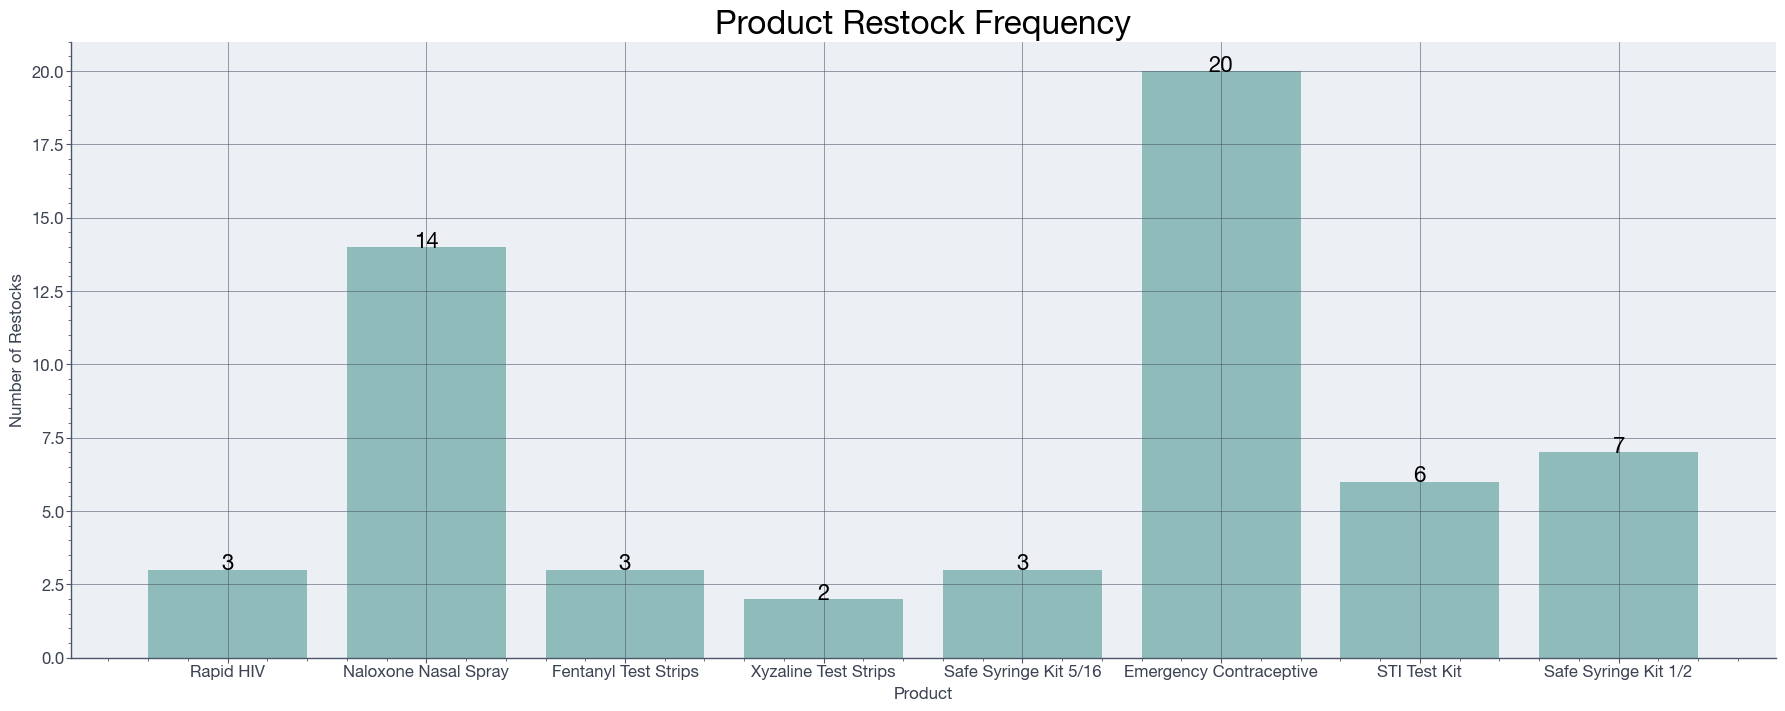

In [32]:
%matplotlib inline
theme = load_theme("arctic_light")
fig, ax = plt.subplots(figsize=(22, 8))

data = rDF["Product"]
labels = data.unique().tolist()
try:
    labels.remove("HAVM Kit") # Removed because it was a test item that never got deleted
except:
    pass

y = []
for l in labels:
    c = data[data == l].count()
    y.append(c)


ax.bar(labels, y)
addLabelsToBar(labels, y)
ax.set_title("Product Restock Frequency", fontdict=TITLE_FONT_DICT)
ax.set_xlabel("Product")
ax.set_ylabel("Number of Restocks")

theme.apply()
fig.savefig("output/product_restocks.png", facecolor=fig.get_facecolor())